# __Gradient Descent with AdaGrad__

**Issues with Momentum in Gradient Descent**
- Sensitivity to Saddle Points:

   - Momentum in Gradient Descent can accelerate convergence towards the minimum by adding a fraction of the previous update to the current one. However, this method can become inefficient when dealing with saddle points, as the accumulated momentum might lead to overshooting, causing oscillations around these points.

- Dependence on Hyperparameters:

   - The performance of Momentum-based optimization is heavily dependent on the fine-tuning of the momentum coefficient and learning rate. Incorrect settings can lead to suboptimal convergence behaviors, such as rapid divergences or very slow progress towards the minimum.

**Introduction of AdaGrad**

- Adaptive Learning Rates:

    - AdaGrad introduces an adaptive learning rate mechanism, which adjusts the learning rate for each parameter based on the historical sum of squared gradients. This approach ensures that parameters with frequently occurring features have diminishing learning rates, and rare features receive larger updates, promoting a more balanced convergence.

- Accumulation of Gradient Information:

   - Unlike Momentum, which primarily relies on the direction of the previous gradient, AdaGrad accumulates the squared gradients in its update rule. This accumulation helps in moderating the update steps, making it robust against the wide variance in data and features.

Let's understand how it works.

## Steps to be followed:

1. Import the required libraries
2. Define and plot the objective function
3. Define the AdaGrad algorithm
4. Optimize the AdaGrad
5. Visualization of AdaGrad on Contour Plot

###Step 1: Import the required libraries

- Import NumPy packages.
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size.
- Import all other necessary libraries.

In [1]:
from numpy import asarray, arange, meshgrid
from numpy.random import rand, seed
from matplotlib import pyplot
from math import sqrt
import numpy as np

### Step 2: Define and plot the objective function
- Define the objective function as the sum of squares of x and y.
- Set the bounds for input variables.
- Generate arrays of x and y values within the specified bounds at 0.1 increments.
- Create a mesh grid from the x and y arrays.
- Compute the objective function values for each combination of x and y in the mesh grid.
- Create a filled contour plot with 50 contour levels and 'jet' color scheme.
- Display the plot.



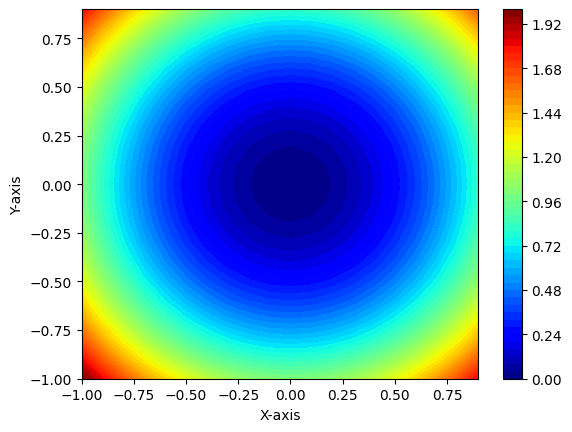

In [2]:
# Define the Objective Function
def objective(x, y):
    return x**2.0 + y**2.0

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Plot the objective function contour
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
pyplot.colorbar()  # Add a color bar to indicate scale
pyplot.xlabel('X-axis')
pyplot.ylabel('Y-axis')
pyplot.show()

### Let's visualize that convex paraboloid on a 3D surface

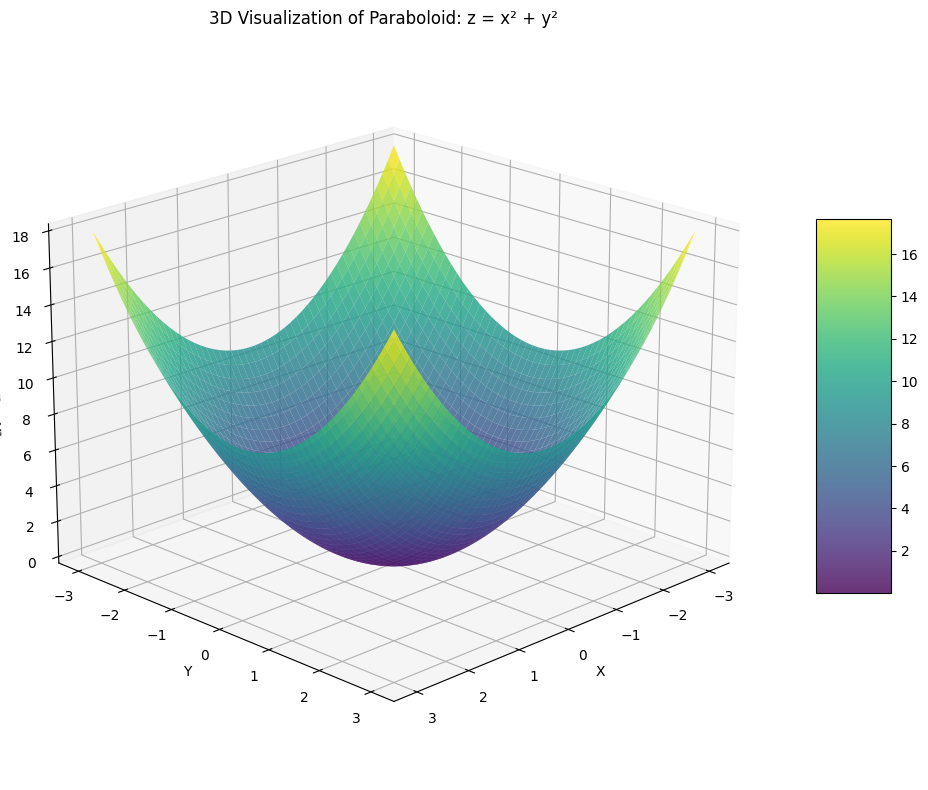

In [3]:
# 3D Visualization of the Paraboloid
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of x and y values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate z = x^2 + y^2 (the paraboloid)
Z = X**2 + Y**2

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z = X² + Y²')
ax.set_title('3D Visualization of Paraboloid: z = x² + y²')

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set viewing angle for better visualization
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

### Step 3: Define the AdaGrad algorithm
- Adjust the step size for each variable, based on the sum of the squared gradients.
- Aim to accelerate the convergence of the gradient descent algorithm by adaptively scaling the step size for each variable.
- Keep track of the sum of the squared partial derivatives for each variable, and the step size is inversely proportional to the square root of this sum.

In [4]:
# Define the derivative of the objective function with respect to x and y
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

# Implement the AdaGrad optimization algorithm
def adagrad(objective, derivative, bounds, n_iter, step_size):
  solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]

    # Iterate over the number of iterations specified
  for it in range(n_iter):
        # Calculate the gradient at the current point
        gradient = derivative(solution[0], solution[1])
        new_solution = []

        # Update each variable in the solution
        for i in range(len(solution)):
            # Update the sum of the squared gradients
            sq_grad_sums[i] += gradient[i]**2.0
            # Calculate the adaptive step size for this variable
            alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
            # Calculate the new value for this variable
            new_solution.append(solution[i] - alpha * gradient[i])

        # Update the solution with the new values
        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])

        # Print progress for each iteration
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))

    # Return the final solution and its evaluation
  return [solution, solution_eval]

## Step 4: Optimize the AdaGrad
- Set the random seed to ensure reproducibility.
- Define the bounds for the input variables.
- Specify the number of iterations.
- Apply the AdaGrad algorithm to find the best solution and its corresponding score.
- Print messages indicating the completion of the optimization process.

In [5]:
# Set the random seed for reproducibility
seed(42)

# Define the bounds for the solution
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Define the number of iterations and the initial step size
n_iter = 50
step_size = 0.1

# Perform the gradient descent search using AdaGrad
best, score = adagrad(objective, derivative, bounds, n_iter, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.15091976  0.80142861]) = 0.66506
>1 f([-0.09937783  0.73498488]) = 0.55008
>2 f([-0.06723901  0.68294935]) = 0.47094
>3 f([-0.04599045  0.63941922]) = 0.41097
>4 f([-0.03160788  0.60167774]) = 0.36302
>5 f([-0.0217711  0.5682117]) = 0.32334
>6 f([-0.01501115  0.53807631]) = 0.28975
>7 f([-0.01035523  0.51063467]) = 0.26086
>8 f([-0.00714506  0.48543311]) = 0.23570
>9 f([-0.0049306   0.46213464]) = 0.21359
>10 f([-0.00340265  0.44048063]) = 0.19403
>11 f([-0.00234825  0.4202673 ]) = 0.17663
>12 f([-0.00162061  0.40133049]) = 0.16107
>13 f([-0.00111844  0.38353558]) = 0.14710
>14 f([-0.00077188  0.36677038]) = 0.13452
>15 f([-0.0005327   0.35094019]) = 0.12316
>16 f([-0.00036764  0.33596406]) = 0.11287
>17 f([-2.53723807e-04  3.21772153e-01]) = 0.10354
>18 f([-1.75105083e-04  3.08303590e-01]) = 0.09505
>19 f([-1.20847122e-04  2.95504918e-01]) = 0.08732
>20 f([-8.34015050e-05  2.83328835e-01]) = 0.08028
>21 f([-5.75587653e-05  2.71733211e-01]) = 0.07384
>22 f([-3.97236415e-05  2.

**Observation:**
- AdaGrad optimizes the objective function with an optimal solution emerging around the 35th iteration. The parameters of the solution were close to 0.0 for both inputs, leading to an evaluation of the objective function at 0.0

## Step 5: Visualization of AdaGrad on Contour Plot

Let's visualize the trajectory of our search using a contour plot of the domain.

- This visualization will help us understand the search's evolution across the algorithm's iterations.

- To achieve this, we'll update the adagrad() function to collect and return a list of all solutions discovered during the search.

- Below, you'll find the updated version of the function that includes these enhancements.

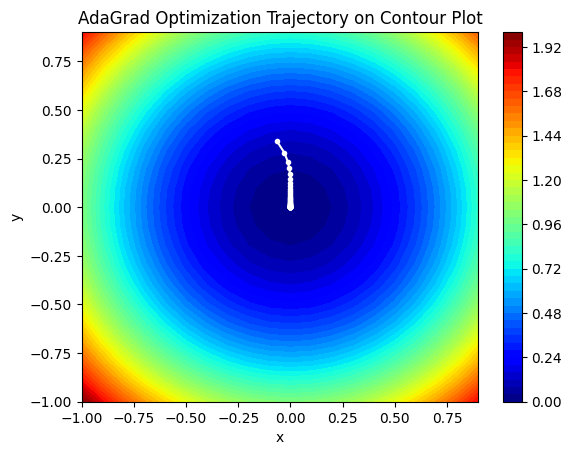

In [6]:
import numpy as np
from numpy.random import seed, rand
from matplotlib import pyplot as plt
from math import sqrt

# Objective function: simple quadratic function
def objective(x, y):
    return x**2.0 + y**2.0

# Derivative of the objective function
def derivative(x, y):
    return np.array([x * 2.0, y * 2.0])

# Gradient descent algorithm with AdaGrad
def adagrad(objective, derivative, bounds, n_iter, step_size):
    solutions = []
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    sq_grad_sums = np.zeros(len(bounds))

    for it in range(n_iter):
        gradient = derivative(solution[0], solution[1])
        sq_grad_sums += gradient**2
        new_solution = solution - (step_size / (1e-8 + np.sqrt(sq_grad_sums))) * gradient
        solutions.append(new_solution)
        solution = new_solution

    return np.array(solutions)

# Set random seed for reproducibility
seed(1)

# Define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 50
step_size = 0.1

# Perform the gradient descent search
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)

# Plotting setup
xaxis = np.arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = np.arange(bounds[1, 0], bounds[1, 1], 0.1)
x, y = np.meshgrid(xaxis, yaxis)
results = objective(x, y)

# Create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='white')  # Plot path with white dots and lines
plt.title('AdaGrad Optimization Trajectory on Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

**Observation:**

A contour plot of the objective function is created and a white dot is shown for each solution found during the search, starting above the optima and progressively getting closer to the optima at the center of the plot.

### Let's visualize AdaGrad on a 3D surface

C:\Users\prate\AppData\Local\Temp\ipykernel_29108\3344608476.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(solutions[:, 0], solutions[:, 1], path_z, 'r.-', linewidth=3, markersize=8,


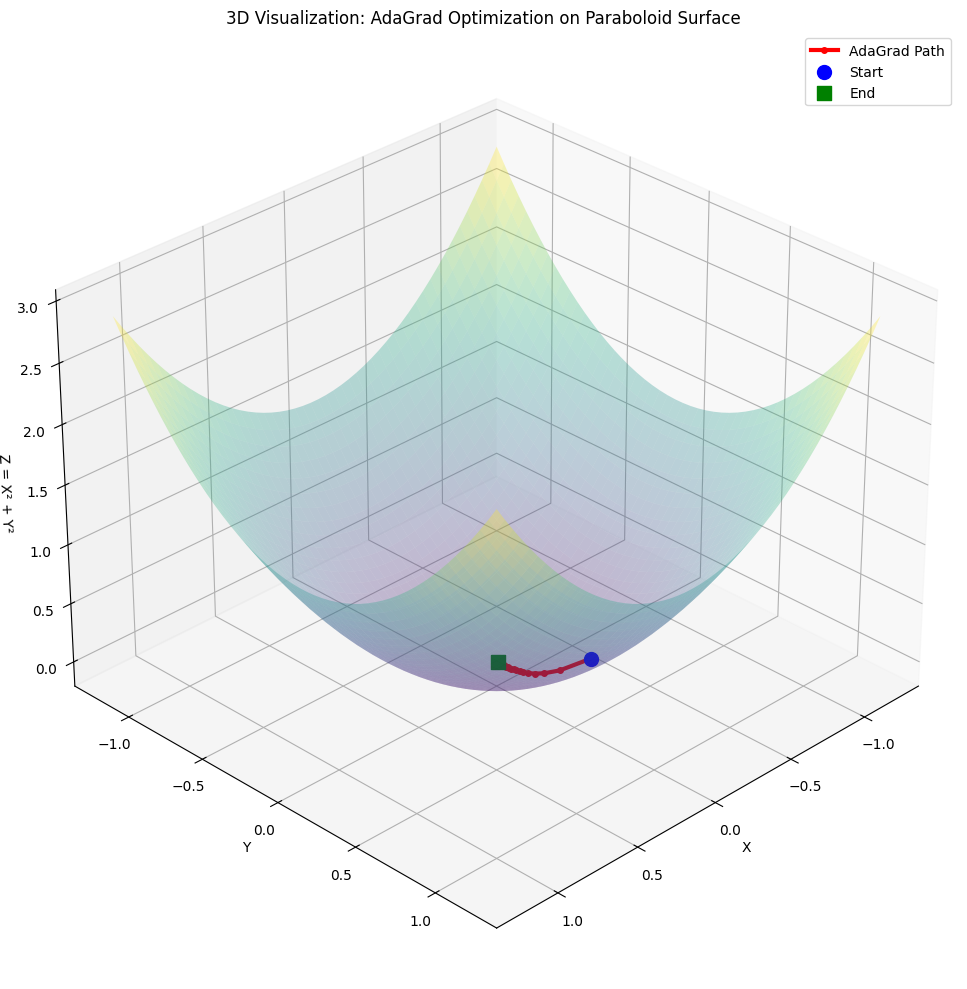

Starting point: (-0.1660, 0.4406)
Ending point: (-0.0000, 0.0059)
Starting objective value: 0.221713
Final objective value: 0.000035


In [7]:
# 3D Visualization of AdaGrad on the Paraboloid Surface
import numpy as np
from numpy.random import seed, rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

# Use the same functions as before
def objective(x, y):
    return x**2.0 + y**2.0

def derivative(x, y):
    return np.array([x * 2.0, y * 2.0])

def adagrad(objective, derivative, bounds, n_iter, step_size):
    solutions = []
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    sq_grad_sums = np.zeros(len(bounds))

    for it in range(n_iter):
        solutions.append(solution.copy())
        gradient = derivative(solution[0], solution[1])
        sq_grad_sums += gradient**2
        new_solution = solution - (step_size / (1e-8 + np.sqrt(sq_grad_sums))) * gradient
        solution = new_solution

    return np.array(solutions)

# Set random seed for reproducibility
seed(1)

# Define parameters
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 30  # Reduced for clearer visualization
step_size = 0.1

# Get optimization path
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)

# Create 3D surface
x = np.linspace(-1.2, 1.2, 50)
y = np.linspace(-1.2, 1.2, 50)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

# Calculate z-values for the optimization path
path_z = objective(solutions[:, 0], solutions[:, 1])

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with transparency
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3, edgecolor='none')

# Plot the optimization path
ax.plot(solutions[:, 0], solutions[:, 1], path_z, 'r.-', linewidth=3, markersize=8, 
        label='AdaGrad Path', color='red')

# Mark starting and ending points
ax.scatter(solutions[0, 0], solutions[0, 1], path_z[0], 
          color='blue', s=100, label='Start', marker='o')
ax.scatter(solutions[-1, 0], solutions[-1, 1], path_z[-1], 
          color='green', s=100, label='End', marker='s')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z = X² + Y²')
ax.set_title('3D Visualization: AdaGrad Optimization on Paraboloid Surface')
ax.legend()

# Set viewing angle
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

# Print some path statistics
print(f"Starting point: ({solutions[0, 0]:.4f}, {solutions[0, 1]:.4f})")
print(f"Ending point: ({solutions[-1, 0]:.4f}, {solutions[-1, 1]:.4f})")
print(f"Starting objective value: {path_z[0]:.6f}")
print(f"Final objective value: {path_z[-1]:.6f}")